In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/Users/lohit/Downloads/1553768847-housing.csv.zip')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [4]:
noNull_data = data.copy()
noNull_data['total_bedrooms'] = noNull_data['total_bedrooms'].fillna(noNull_data['total_bedrooms'].mean())

In [5]:
noNull_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [6]:
noNull_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
def dealing_outliers(dframe, cols, min_q, max_q):
    for i in cols: 
        min_thresold, max_thresold = dframe[i].quantile([min_q, max_q])
        dframe = dframe[(dframe[i] > min_thresold) & (dframe[i] < max_thresold)]
    return dframe

In [8]:
cols = ['total_rooms', 'total_bedrooms', 'households', 'median_house_value', 'housing_median_age', 'population'] 
noNull_outliers_data = dealing_outliers(noNull_data.copy(), cols, 0.1, 0.99)

In [9]:
noNull_outliers_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000
mean,-119.400747,35.295987,28.405710,2915.358914,602.317788,1649.393904,569.896104,3.844241,208836.653429
std,1.938341,2.011949,9.592348,1251.878440,248.045487,644.554525,226.078903,1.470063,88375.476270
min,-124.300000,32.550000,13.000000,948.000000,262.000000,871.000000,288.000000,0.683100,86200.000000
25%,-121.660000,33.890000,20.000000,2043.000000,419.000000,1161.000000,402.000000,2.750000,142000.000000
50%,-118.350000,34.130000,28.000000,2627.000000,537.870553,1481.000000,510.000000,3.640600,189800.000000
75%,-117.980000,37.460000,35.000000,3476.000000,716.000000,1949.000000,674.000000,4.708300,259400.000000
max,-114.600000,41.950000,51.000000,10282.000000,1780.000000,4027.000000,1474.000000,11.112100,500000.000000


In [10]:
noNull_outliers_data = noNull_outliers_data.reset_index(drop=True)

In [11]:
input_data = noNull_outliers_data.iloc[:, :len(noNull_outliers_data.columns)-1]
target_data = noNull_outliers_data['median_house_value']

In [12]:
input_cols = input_data.columns.drop(['ocean_proximity'])
len(input_cols)

8

In [13]:
def plot(input_df, y, input_cols):
    for i in input_cols:
        x = input_df[i]
        plt.figure(figsize=(5,3))
        plt.scatter(x, y)
        plt.xlabel(x.name)
        plt.ylabel(y.name)
        plt.show()

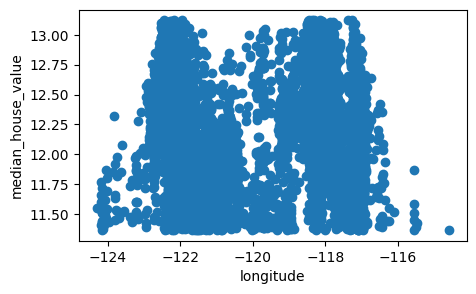

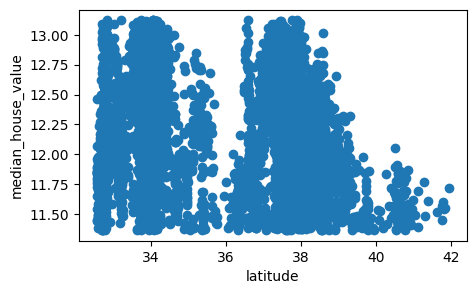

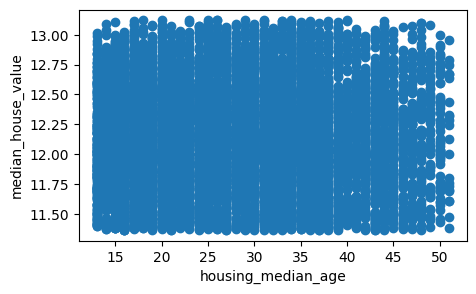

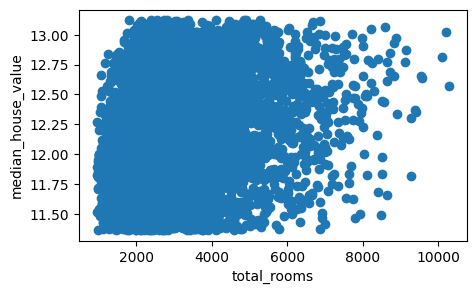

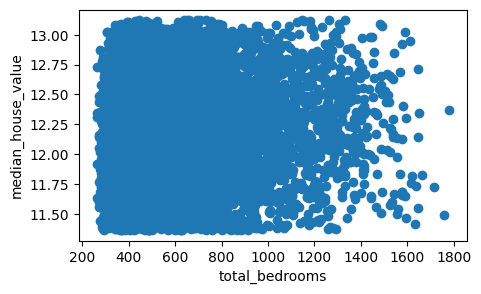

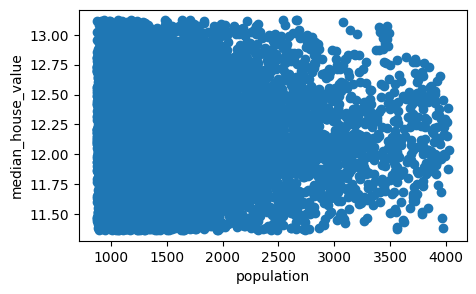

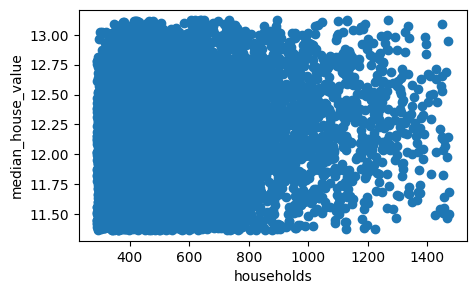

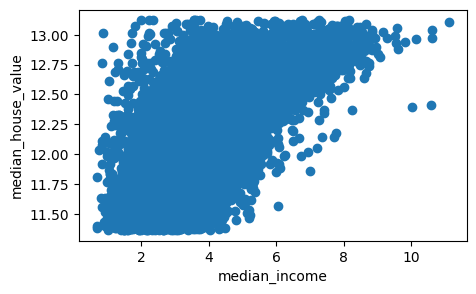

In [14]:
plot(input_data, np.log(target_data), input_cols)

In [15]:
input_data = input_data.drop(['households'], axis=1)
input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,ocean_proximity
0,-122.22,37.86,21,7099,1106.0,2401,8.3014,NEAR BAY
1,-122.26,37.84,42,2555,665.0,1206,2.0804,NEAR BAY
2,-122.26,37.84,50,2239,455.0,990,1.9911,NEAR BAY
3,-122.27,37.85,42,1639,367.0,929,1.7135,NEAR BAY
4,-122.28,37.84,50,2082,492.0,1131,1.6424,NEAR BAY
...,...,...,...,...,...,...,...,...
9312,-121.45,39.26,15,2319,416.0,1047,3.1250,INLAND
9313,-121.53,39.19,27,2080,412.0,1082,2.5495,INLAND
9314,-121.56,39.27,28,2332,395.0,1041,3.7125,INLAND
9315,-121.22,39.43,17,2254,485.0,1007,1.7000,INLAND


In [16]:
#input_data = input_data.drop(['housing_median_age'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
total_sampel_counts = input_data.shape[0]
train_data_counts = int(0.8*total_sampel_counts)
validation_data_counts = int(0.1*total_sampel_counts)
test_data_counts = total_sampel_counts - train_data_counts - validation_data_counts

In [19]:
print(total_sampel_counts, 
      train_data_counts, 
      validation_data_counts, 
      test_data_counts)

9317 7453 931 933


In [20]:
train_input = input_data[:train_data_counts]
train_target = target_data[:train_data_counts]
validation_input = input_data[train_data_counts: train_data_counts+validation_data_counts]
validation_target = target_data[train_data_counts: train_data_counts+validation_data_counts]
test_input = input_data[train_data_counts+validation_data_counts :]
test_target = target_data[train_data_counts+validation_data_counts :]

In [21]:
np.savez('train_data', inputs=train_input, targets=train_target)
np.savez('validation_data', inputs=validation_input, targets=validation_target)
np.savez('test_data', inputs=test_input, targets=test_target)